<a href="https://colab.research.google.com/github/Sinethemba-nongqoto/Research-project/blob/master/Analysis_0f_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries
---
1. **Data Manipulation**
- Pandas, numpy
2. **Data Visualization**
- Matplotlib, seaborn

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [3]:
features_data = pd.read_csv('https://raw.githubusercontent.com/Sinethemba-nongqoto/Research-project/master/data/Features%20data%20set.csv')
sales_data = pd.read_csv('https://raw.githubusercontent.com/Sinethemba-nongqoto/Research-project/master/data/sales%20data-set.csv')
stores_data = pd.read_csv('https://raw.githubusercontent.com/Sinethemba-nongqoto/Research-project/master/data/stores%20data-set.csv')

In [4]:
sales_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
features_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
stores_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# Description analysis

In [7]:
print(sales_data.shape)
print(features_data.shape)
print(stores_data.shape)

(421570, 5)
(8190, 12)
(45, 3)


# Preprocessing
---
Exploring the descriptive statistics of the variables

In [8]:
sales_data.describe(include= 'all')

,Store,Dept,Date,Weekly_Sales,IsHoliday
count,421570.000000,421570.000000,421570,421570.000000,421570
unique,NaN,NaN,143,NaN,2
top,NaN,NaN,23/12/2011,NaN,False
freq,NaN,NaN,3027,NaN,391909
mean,22.200546,44.260317,NaN,15981.258123,NaN
std,12.785297,30.492054,NaN,22711.183519,NaN
min,1.000000,1.000000,NaN,-4988.940000,NaN
25%,11.000000,18.000000,NaN,2079.650000,NaN
50%,22.000000,37.000000,NaN,7612.030000,NaN
75%,33.000000,74.000000,NaN,20205.852500,NaN


In [9]:
features_data.describe(include ='all')

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
count,8190.000000,8190,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190
unique,NaN,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,16/07/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7605
mean,23.000000,NaN,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,NaN
std,12.987966,NaN,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,NaN
min,1.000000,NaN,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,NaN
25%,12.000000,NaN,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,NaN
50%,23.000000,NaN,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,NaN
75%,34.000000,NaN,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,NaN


In [10]:
stores_data.describe(include = 'all')

,Store,Type,Size
count,45.000000,45,45.000000
unique,NaN,3,NaN
top,NaN,A,NaN
freq,NaN,22,NaN
mean,23.000000,NaN,130287.600000
std,13.133926,NaN,63825.271991
min,1.000000,NaN,34875.000000
25%,12.000000,NaN,70713.000000
50%,23.000000,NaN,126512.000000
75%,34.000000,NaN,202307.000000


# Merge the data in a unique DataFrame
---

In [12]:
sales_df = pd.merge(sales_data,features_data, on=['Store', 'Date', 'IsHoliday'], how='left')

sales_df = pd.merge(sales_df, stores_data, on = ['Store'], how='left')

#for missing values we put 0 to all NaN

sales_df = sales_df.fillna(0)
# converting temperature to degrees celcius 
sales_df['Temperature'] = (sales_df['Temperature']- 32) * 5./9.

types_encoded, types = sales_df['Type'].factorize()
sales_df['Type'] = types_encoded

sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,12/02/2010,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,19/02/2010,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,26/02/2010,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,05/03/2010,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


# Check data and features

In [13]:
print('training_data duplicated:{}'.format(sales_df.duplicated().sum()))
sales_df.drop_duplicates(inplace =True)

training_data duplicated:0


In [14]:
tab_info = pd.DataFrame(sales_df.dtypes).T.rename(index={0:'column Type'})
tab_info = tab_info.append(pd.DataFrame(sales_df.isnull().sum()).T.rename(index={0:'null values(nb)'}))
tab_info = tab_info.append(pd.DataFrame(sales_df.isnull().sum()/sales_df.shape[0]*100).T.rename(index={0: 'null values(%)'}))

tab_info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
column Type,int64,int64,object,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
null values(nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values(%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Gain some graphichal insight
---

Plot some of the variables present in the data frame such as temperature, fuel price, CPI, unemployment rate, ...

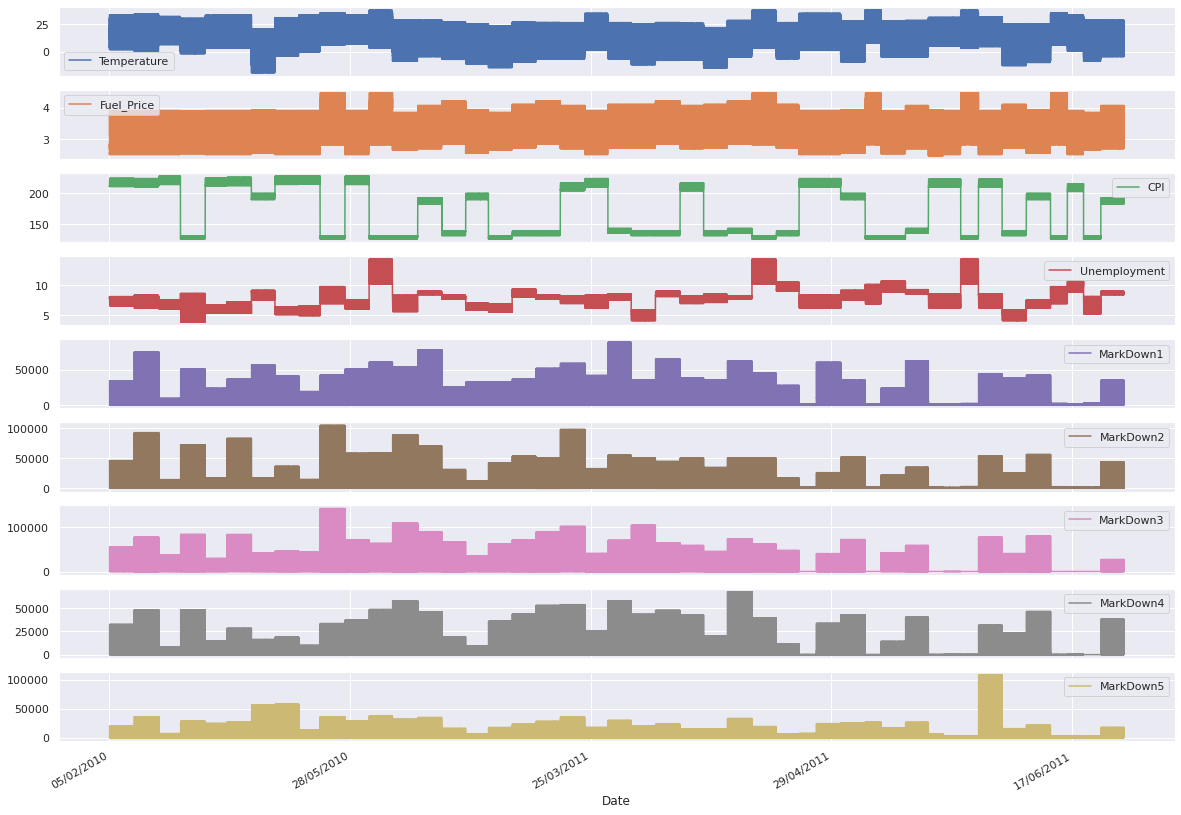

In [15]:
sales_df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize= (20, 15))
plt.show()

We sum the weekly sales from every shop to get the total weekly sales volume of the retail chain 

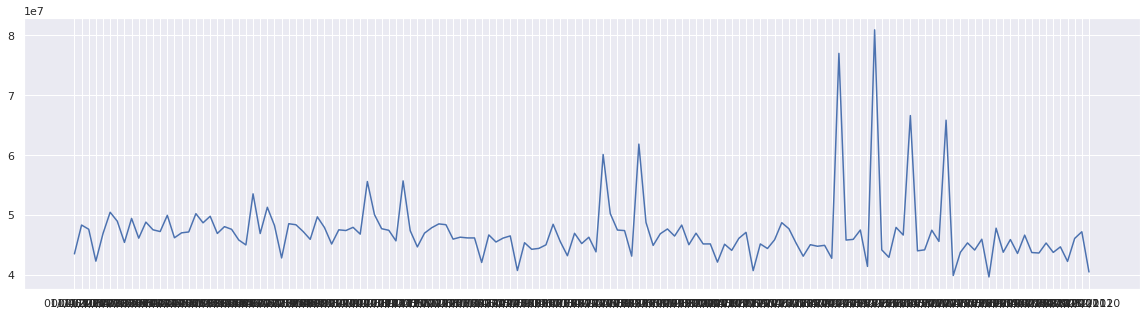

In [16]:
sales_df_average_sales_week = sales_df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
sales_df_average_sales =sales_df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(sales_df_average_sales_week.Date, sales_df_average_sales_week.Weekly_Sales)
plt.show()

# Get more insights

In [17]:
# The more remunerative weeks
sales_df_average_sales.head() 

,Date,Weekly_Sales
112,24/12/2010,80931415.60
107,23/12/2011,76998241.31
117,25/11/2011,66593605.26
122,26/11/2010,65821003.24
79,17/12/2010,61820799.85


In [18]:
st = sales_df_average_sales_week.set_index('Date')
#st = st.resample('H').ffill()
#st = st.resample('W').sum()

In [19]:
# The least remunerative weeks
sales_df_average_sales[::-1].head()

,Date,Weekly_Sales
128,28/01/2011,39599852.99
123,27/01/2012,39834974.67
142,31/12/2010,40432519.00
95,21/01/2011,40654648.03
62,14/01/2011,40673678.04


In [20]:

# Top performing type of stores in term of sales

sales_df_top_stores = sales_df.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
sales_df_top_stores.sort_values('Weekly_Sales', ascending=False)

,Type,Weekly_Sales
0,0,4.331015e+09
1,1,2.000701e+09
2,2,4.055035e+08


In [21]:
# Top performing stores in term of sales
sales_df_top_stores =sales_df.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
sales_df_top_stores.sort_values('Weekly_Sales', ascending=False)[:3]

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08


# Forecast of the total sales volume

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


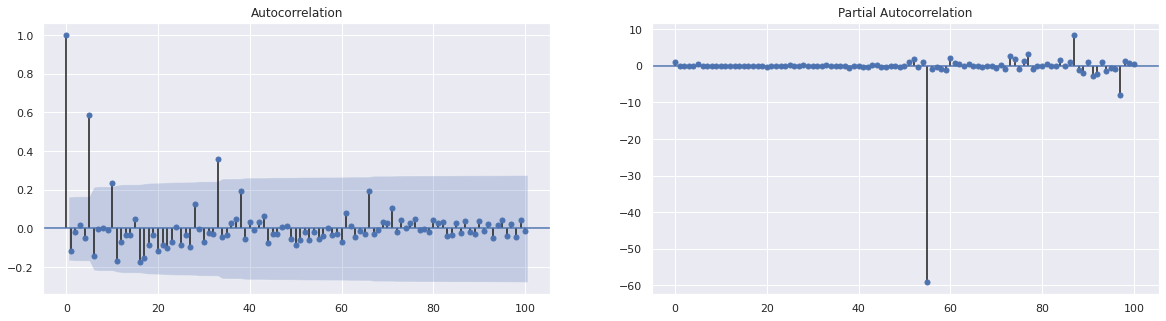

In [29]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(st, lags =100, ax=axes[0])
plot_pacf(st, lags=100, ax=axes[1])
plt.show()

# Model definition
---
Since the AR model we implemented in the statsmodels library allows to include  only consecutive seasonality terms, I implement the model manually. In this way I can use non consecutive seasonality terms like weeks 1, 6,18,38, 52 as observed from the correlation analysis.

In [30]:
#from sklearn.linear_model import LinearRegression
def fit_ar_model(st, orders):

  X=np.array([st.values[(i-orders)].squeeze() if i>=np.max(orders) else np.array(len(orders)*[np.nan]) for i in range(len(st))])

  mask = ~np.isnan(X[:,:1]).squeeze()

  Y= st.values

  lin_reg = LinearRegression()
  lin_reg.fit(X[mask], Y[mask])

  print(lin_reg.coef_, lin_reg.intercept_)
  print('Score factor: %.2f' % lin_reg.score(X[mask], Y[mask]))

  return lin_reg.coef_, lin_reg.intercept_

def predict_ar_model(st, orders, coef, intercept):
  return np.array([np.sum(np.dot(coef, st.values[(i-orders)].squeeze())) + intercept if i >= np.max(orders) else np.nan for i in range(len(st))])



Given the seasonality observed from the ACF and the PACF function, the AR model is implemented including seasonality from weeks (1,6,18,38,52).


[[-0.13474448 -0.09198664 -0.0696172   0.84915362 -0.13400209]] [27129898.01909433]
Score factor: 0.22


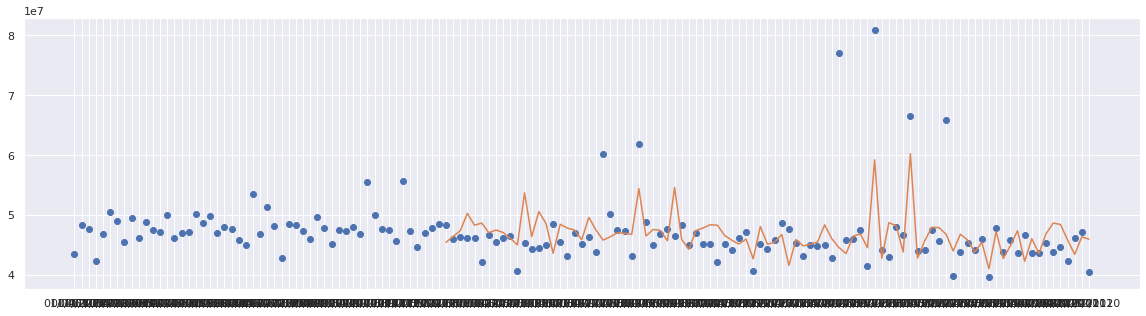

In [32]:


orders=np.array([1,6,18,38,52])
coef, intercept = fit_ar_model(st,orders)
pred=pd.DataFrame(index=st.index, data=predict_ar_model(st, orders, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(st, 'o')
plt.plot(pred)
plt.show()



AR Residuals: avg -0.01, std 0.09


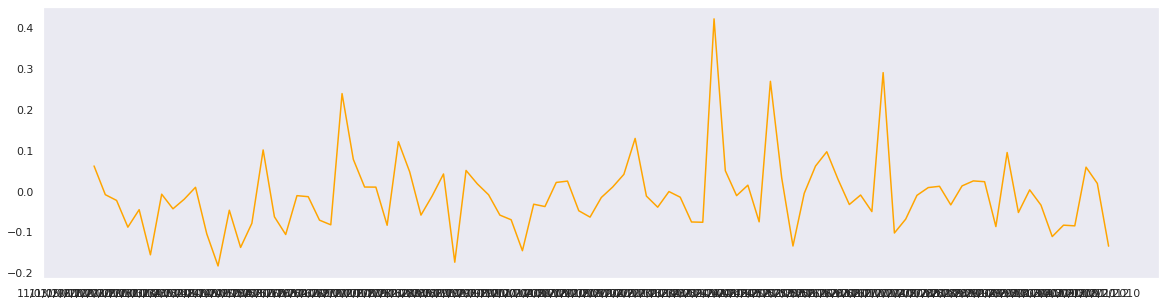

In [33]:
diff=(st['Weekly_Sales']-pred[0])/st['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange')
plt.grid()
plt.show()



The predictive model has an R^2 score factor of 0.22 (max score for perfect prediction would be 1). The residual distribution is centered in 0 with an STD of 9%.


# Forecast of the store-wise sales volume
---

We develop the forecast model for the store number 20, which shows the highest sales volume.


In [34]:
df20=sales_df.where( sales_df['Store'] == 20)
df20=df20.dropna()
df20=df20.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df20 = df20.set_index('Date')
df20.head()

,Weekly_Sales
Date,
01/04/2011,1927993.09
01/06/2012,2143126.59
01/07/2011,2053165.41
01/10/2010,1933719.21
02/03/2012,2148822.76


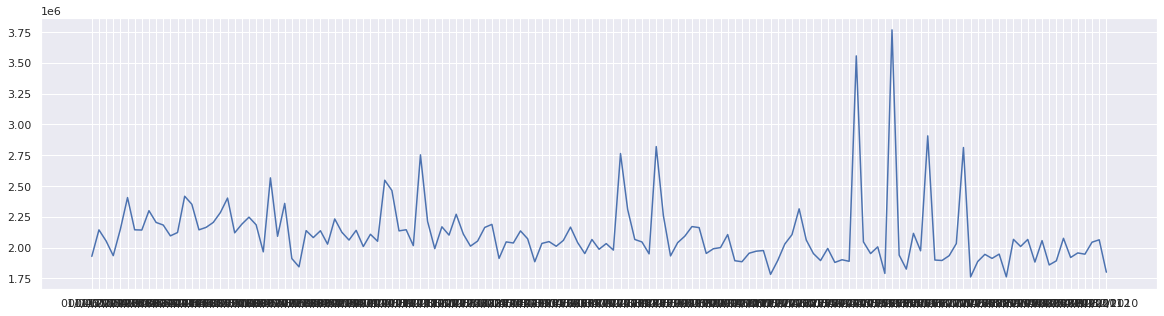

In [35]:
plt.figure(figsize=(20,5))
plt.plot(df20.index, df20.values)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


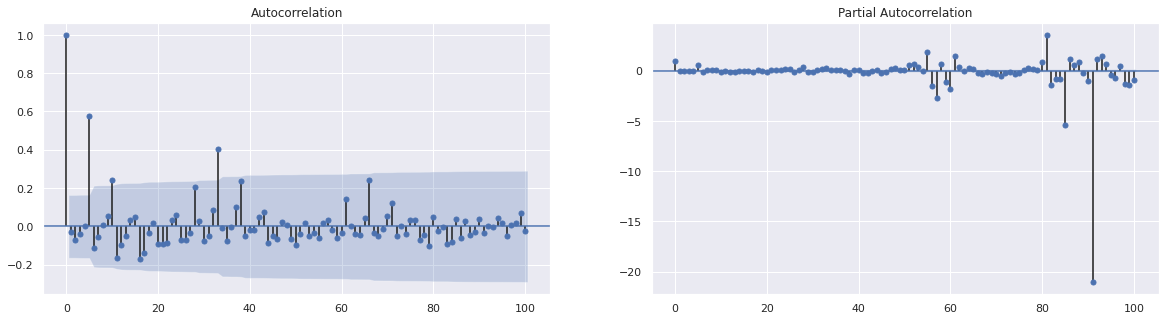

In [36]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(df20.values, lags=100, alpha=0.05, ax=axes[0])
plot_pacf(df20.values, lags=100, alpha=0.05, ax=axes[1])
plt.show()

This particular store shows additional seasonalities from week 29 and 46 which will be included in the AR model.


[[-0.02341691 -0.22252265  0.03976347 -0.04526995  0.82311385 -0.27419834
  -0.0061471 ]] [1452372.42849472]
Score factor: 0.28


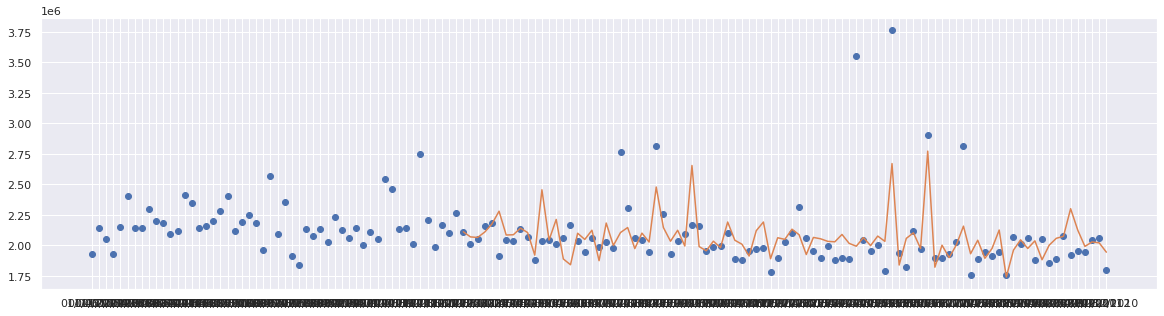

In [37]:
orders=np.array([1,6,18,29,38,46,52])
coef, intercept = fit_ar_model(df20,orders)
pred=pd.DataFrame(index=df20.index, data=predict_ar_model(df20, orders, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(df20, 'o')
plt.plot(pred)
plt.show()

AR Residuals: avg -0.01, std 0.10


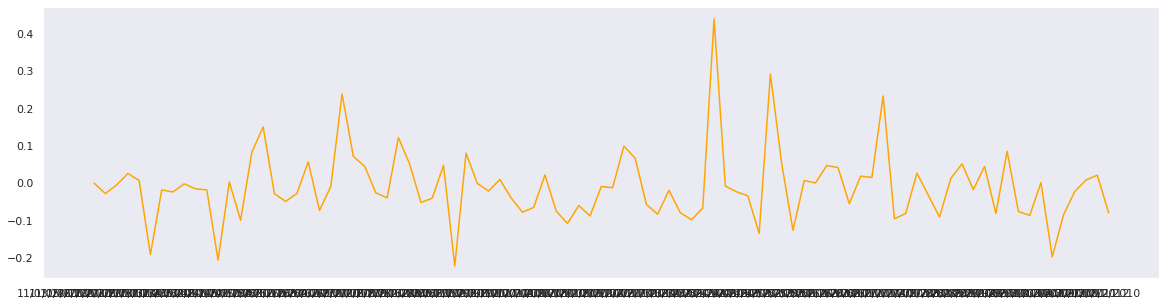

In [49]:
diff=(df20['Weekly_Sales']-pred[0])/df20['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange')
plt.grid()
plt.show()

The predictive model has an R^2 score factor of 0.28 (max score for perfect prediction would be 1.). The residual distribution is centered in 0 with an STD of 10%.



# Look for predictive power from external variables

In [40]:
dfext=sales_df.where( sales_df['Store'] == 20)
dfext=dfext.dropna()
dfext=dfext.groupby(by=['Date'], as_index=False)[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
                                                  'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean()
dfext = dfext.set_index('Date')
dfext.head()

,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,,,,,
01/04/2011,0.238889,3.638,207.882304,7.287,0.00,0.00,0.00,0.00,0.00
01/06/2012,23.150000,3.742,214.551328,7.139,12240.61,17.40,82.98,3560.21,3373.36
01/07/2011,20.922222,3.748,208.334643,7.274,0.00,0.00,0.00,0.00,0.00
01/10/2010,16.155556,2.707,204.885097,7.484,0.00,0.00,0.00,0.00,0.00
02/03/2012,4.433333,3.816,213.671813,6.961,34117.01,3200.31,6.00,22275.03,4989.30


In [41]:
dfext.describe()

,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,13.028555,3.417608,209.038131,7.371413,4013.042867,1815.373007,956.883986,1934.258951,2159.098951
std,9.191026,0.443029,4.176736,0.305069,8231.447936,9402.698654,8733.609037,5799.518501,4293.364349
min,-6.450000,2.699000,203.610178,6.961000,0.000000,-0.990000,0.000000,0.000000,0.000000
25%,6.036111,2.921000,204.774194,7.139000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.805556,3.541000,208.556714,7.287000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.294444,3.809000,213.372861,7.484000,6185.310000,70.000000,17.675000,1325.400000,3484.570000
max,26.222222,4.066000,216.151590,8.187000,58928.520000,97740.990000,101378.790000,53603.990000,35675.620000


In [42]:
dfext['shifted_sales'] = df20.shift(-1)
dfext.head()

,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,shifted_sales
Date,,,,,,,,,,
01/04/2011,0.238889,3.638,207.882304,7.287,0.00,0.00,0.00,0.00,0.00,2143126.59
01/06/2012,23.150000,3.742,214.551328,7.139,12240.61,17.40,82.98,3560.21,3373.36,2053165.41
01/07/2011,20.922222,3.748,208.334643,7.274,0.00,0.00,0.00,0.00,0.00,1933719.21
01/10/2010,16.155556,2.707,204.885097,7.484,0.00,0.00,0.00,0.00,0.00,2148822.76
02/03/2012,4.433333,3.816,213.671813,6.961,34117.01,3200.31,6.00,22275.03,4989.30,2405395.22


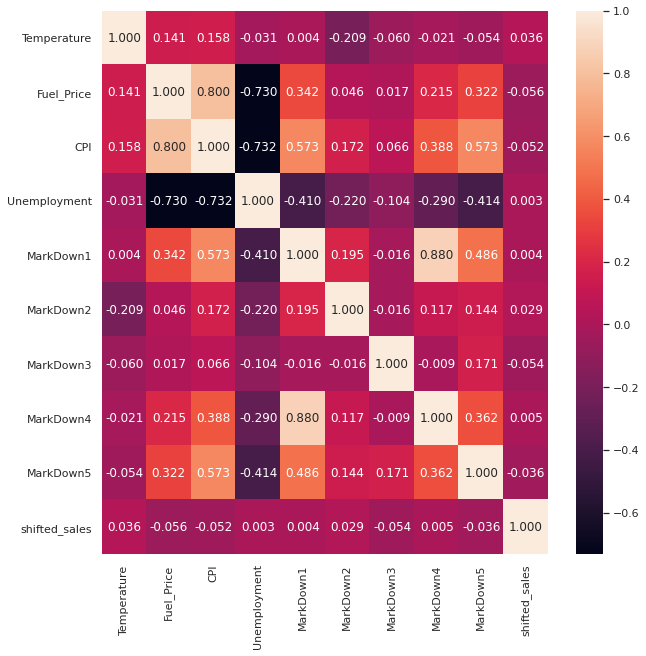

In [44]:
#import seaborn as sns
corr = dfext.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".3f", xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [45]:
corr['shifted_sales'].sort_values(ascending=False)

shifted_sales    1.000000
Temperature      0.035583
MarkDown2        0.029480
MarkDown4        0.004743
MarkDown1        0.003534
Unemployment     0.003282
MarkDown5       -0.035588
CPI             -0.051847
MarkDown3       -0.054248
Fuel_Price      -0.056074
Name: shifted_sales, dtype: float64

The external variables available have some correlation with the 1-day lagged sales time series. This means that they have some degree of predictive power at 1 day and can be used to improve our model. The 'Temperature' and the 'Fuel_Price' being the most correlated and anti-correlate variables respectively.

In [46]:
#from sklearn.linear_model import LinearRegression
def fit_ar_model_ext(st, orders, ext, fitter=LinearRegression()):

  X=np.array([st.values[(i-orders)].squeeze() if i>=np.max(orders) else np.array(len(orders)*[np.nan]) for i in range(len(st))])

  X=np.append(X, ext.values, axis=1)

  mask = ~np.isnan(X[:,:1]).squeeze()

  Y= st.values

  fitter.fit(X[mask], Y[mask].ravel())

  print(fitter.coef_, fitter.intercept_)

  print('Score factor: %.2f' % fitter.score(X[mask], Y[mask]))

  return fitter.coef_, fitter.intercept_

def predict_ar_model_ext(st, orders, ext, coef, intercept):

  X=np.array([st.values[(i-orders)].squeeze() if i>=np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(st))])

  X=np.append(X, ext.values, axis=1)

  return np.array(np.dot(X, coef.T) + intercept)

[ 2.30769350e-02 -3.99130391e-01  2.46045935e-02 -3.84946223e-02
  6.48743368e-01 -8.97757263e-02 -4.00067001e-02 -6.08967108e+04
 -1.79694237e+05  2.23120553e+04 -1.27541353e+04  5.36490339e+00
 -4.14653363e+00  1.44677725e+00 -6.64626009e+00 -1.00871272e+01] -1623759.706692534
Score factor: 0.37


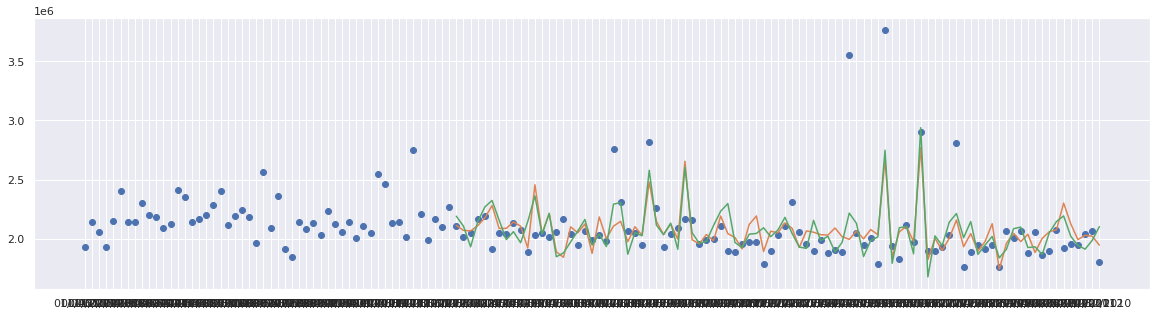

In [47]:
#dfexte=dfext.drop(['shifted_sales'], axis=1)
dfexternal= dfext[['Unemployment','Fuel_Price','CPI','Temperature', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']]

orders=np.array([1,6,18,29,38,46,52])
coef, intercept = fit_ar_model_ext(df20,orders,dfexternal)
pred_ext=pd.DataFrame(index=df20.index, data=predict_ar_model_ext(df20, orders, dfexternal, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(df20, 'o')
plt.plot(pred)
plt.plot(pred_ext)
plt.show()

AR Residuals: avg -0.01, std 0.10
AR with Ext Residuals: avg -0.01, std 0.10


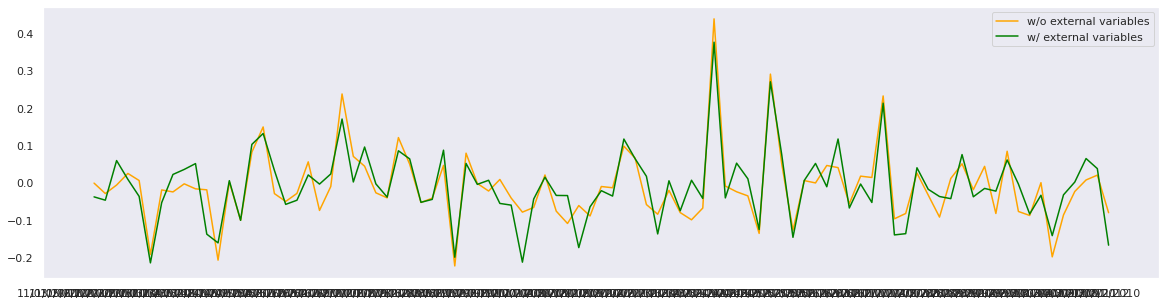

In [50]:
diff=(df20['Weekly_Sales']-pred[0])/df20['Weekly_Sales']
diff_ext=(df20['Weekly_Sales']-pred_ext[0])/df20['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
print('AR with Ext Residuals: avg %.2f, std %.2f' % (diff_ext.mean(), diff_ext.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange', label='w/o external variables')
plt.plot(diff_ext, c='green', label='w/ external variables')
plt.legend()
plt.grid()
plt.show()



The model including the external variables improve the accuracy of the prediction by more than 30% ( R^2 score: 0.37% w.r.t 0.28). The standard deviation of the residual remain the same w/o external variables (10% w.r.t. 10%).


# To do next:
---

* We will apply the forecast model with
external informations on each store and sum the result to forcast the total sales volume

